# Tensorflow and Keras
## Getting Started with MNIST

Example script adapted from [this tutorial](https://www.youtube.com/watch?v=eU0FFjYumCI) from GNT Learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Normalize the data provided in each set. As it says in the dataset documentation: "Pixel values range from 0 to 255", i.e., each tuple value is between 0 and 255 but, in order to use it to train a Machile Learning application, we need these values within the [0-1] scale, hence the normalization bellow.

## NOTE: Though we are dividing the array by an integer (255), python is smart enough to automatically cast the result into a <b>float</b> value, so there's no need for additional cast or float specifications

In [4]:
x_train = x_train/255
# y_train = y_train/255

x_test = x_test/255
# y_test = y_test/255

x_train =  (60000, 28, 28)
y_train =  (60000,)


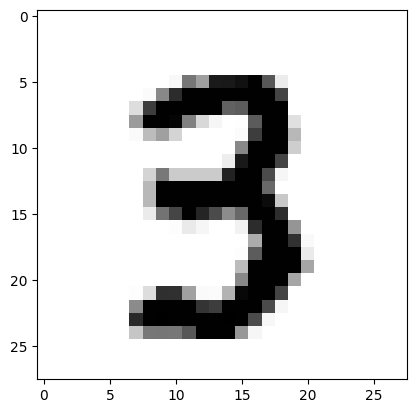

In [5]:
# Let's see how the data looks like so far
print("x_train = ", x_train.shape)
print("y_train = ", y_train.shape)

# Print out one of the training datapoints using the matplotlib module
plt.imshow(x_train[25413], cmap='Greys')

# Now to start buildind the learning model
## This model is going to use a Multinomial Logistic Regression, which apparentely is one of the simpler ones...

What this does is applying a linear transformation to the data and apply a soft max to convert the evidence into probabilities.
Tensorflow wise, this implies a Sequential model, i.e., a model that can have multiple layers in it that do different transformations but the output of one layer is going to be the input of the next one, and so on sequentially.

For this case, a single Dense layer (as in a layer of Artificial Neurons), i.e., there is a dense set of connections that perform a full blown linear transformation using all values from the input in a linear combination to get all the values from the output.

In [9]:
model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])

model_lr.compile(optimizer='adam', loss='categorical_crossentropy')
model_lr.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

The first input from the 'Dense' specification relates to the size of the output layer, namely, how many nodes or Artificial Neurons at the exit. Since we are classifying a shit ton of images into one of ten containers, i.e., the digits from 0 to 9, this value is the size of the output vector, which is the number of "classification boxes" where the data is to be classified into.

This model uses the 'softmax' activation function. Basically, for this case, each image is "classified" with 10 probability values that all add up to 1. The 10 obviously refers to the size of the output vector, which was defined in the previous argument. The idea is to have the highest of those values at the spot where the image belongs to.
Example: lets say the model is classifying a "4". Any human can look at the jpeg file and recognize the number 4, but a machine not so much. After running this model on that image, the expected output (if the model was properly trained) should be something like <code>[0.0, 0.0, 0.01, 0.1, 0.78 , 0.1, 0.01, 0.0,  0.0, 0.0]</code>.

The indexes of the array represent the digit in question. Looking at this array, one can see that <code>P(4) = 0.58 > P(3), P(5), >> P(2), P(6)...</code>
In other words, the model classified the image as a "4" with 78% of probability, but there's a 10% probability of it being either a "3" or a "5" and a 1% probability of having a "2" or a "6". The model was able to discard all the other digits.

An ideal model should provide an output such as <code>[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0] </code>, but things are never this perfect...

Finally, the *input_shape* argument is merely indicative, so that the module can properly allocate resources based on the input data that is about to receive.

# How to decode what is going on here:
`model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10, activation="softmax", input_shape=x_train.shape[1:])
])`

This model has 3 Sequential layers (the Sequential means one comes ater the other). Data is fed into the model via the Input layers (which was informed a priori of the shape of the data that is about to come in), then moves to a Flatten layer that that removes any dimensionability from the data (each *data point* is actually a 28x28 pixel matrix. The flattening converts this into a single value, which is confirmed by the output of the block above:

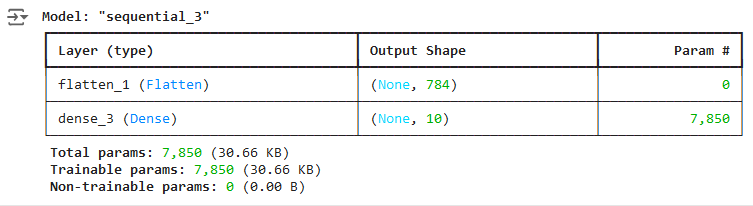


The Output shape of the Flattening layers is (None, 784), where 784 = 28 x 28, i.e., a 28x28 pixel image has 784 pixels in total. Flattening this creates a single value of that length). After being flattened, the data goes into a Dense layer that attempts to classify it, namely, which digit is represented in the image.